**Steps for Fine-tuning the Model for Cell-type Annotation:**

1.  **Prepare Your Environment:** Ensure you have the necessary Python libraries installed (as indicated in the original script).
2.  **Download Datasets and Pre-trained Model:** Obtain the gene and protein expression data files for training and testing, as well as the pre-trained model files.
3.  **Organize File Paths:** Make sure the paths to your data files and the pre-trained model are correctly specified.
4.  **Execute the Python Script:** Run the Python script from your terminal, providing the required parameters to control the fine-tuning process.
5.  **Monitor Training (if applicable):** If you are training (`--do_train`), observe the output in your terminal to track the progress (loss, learning rate, etc.).
6.  **Locate Output Files:** After the script finishes, the fine-tuned model, generated feature files and predicted results will be saved in the directory specified by the `--save_dir` parameter (Please download our dataset, fine-tuned models, generated feature files and predicted results from https://drive.google.com/drive/folders/1Gn7S4ERAJybhn28XMIDRhAtsRVo8cG65?usp=drive_link).

**Python Command to Run Fine-tuning:**

```bash
python finetune.py --species human --train_gene_file /home/jiboya/captain/cell_type_anno/dataset1/pbmc_gene_train.h5ad --train_protein_file /home/jiboya/captain/cell_type_anno/dataset1/pbmc_protein_train.h5ad --test_gene_file /home/jiboya/captain/cell_type_anno/dataset1/pbmc_gene_test.h5ad --test_protein_file /home/jiboya/captain/cell_type_anno/dataset1/pbmc_protein_test.h5ad --save_dir /home/jiboya/captain/cell_type_anno/dataset1/ --load_model /home/jiboya/captain_model --epochs 40 --batch_size 26 --lr 1e-4
```

**Explanation of the Command:**


  * `--species human`: Specifies that the dataset is from human. Use `--species mouse` if your data is from mouse.
  * `--train_gene_file`: Provides the path to the training data for gene expression.
  * `--train_protein_file`: Provides the path to the training data for protein expression (ADT).
  * `--test_gene_file`: Provides the path to the test data for gene expression.
  * `--test_protein_file`: Provides the path to the test data for protein expression (ADT).
  * `--save_dir`: Sets the directory where the output files (fine-tuned model, feature files, etc.) will be saved.
  * `--load_model`: Specifies the directory containing the pre-trained model to start the fine-tuning from.
  * `--epochs`: Sets the number of times the entire training dataset will be passed through the model during fine-tuning.
  * `--batch_size`: Determines the number of data samples that will be processed together in one batch during training.
  * `--lr`: Sets the learning rate, which controls the step size during the optimization process.

Remember to adjust the file paths according to the actual location of your data and pre-trained model. You can also modify other parameters as needed based on your specific requirements.

In [7]:
import scanpy as sc 

adata = sc.read_h5ad("/home/jiboya/Captain/cell_type_anno/dataset1/pbmc_gene_test.h5ad")
# adata = adata[:100]
adata_protein = sc.read_h5ad("/home/jiboya/Captain/cell_type_anno/dataset1/pbmc_protein_test.h5ad")
# adata_protein = adata_protein[:100]

celltype_counts = adata.obs['celltype.l2'].value_counts() 


In [9]:
cell_types = adata.obs['celltype.l2'] 

In [10]:
cell_types

index
L1_AAACCCAAGAAACTCA           CD14 Mono
L1_AAACCCAAGACATACA             CD4 TCM
L1_AAACCCACAACTGGTT           CD8 Naive
L1_AAACCCACACGTACTA                  NK
L1_AAACCCACAGCATACT           CD8 Naive
                              ...      
E2L8_TTTGTTGGTCGTGATT         CD8 Naive
E2L8_TTTGTTGGTGTGCCTG         CD14 Mono
E2L8_TTTGTTGGTTAGTTCG    B intermediate
E2L8_TTTGTTGGTTGGCTAT         CD16 Mono
E2L8_TTTGTTGTCTCATGGA         CD14 Mono
Name: celltype.l2, Length: 158919, dtype: category
Categories (20, object): ['B intermediate', 'B memory', 'B naive', 'CD14 Mono', ..., 'NK_CD56bright', 'pDC', 'Platelet', 'Treg']

In [15]:
import omicverse as ov
#import scvelo as scv
ov.plot_set()


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.10, Tutorials: https://omicverse.readthedocs.io/
Dependency error: The 'bioservices' distribution was not found and is required by the application


In [21]:
import numpy as np
colors=np.array(['#3ba458',  '#404040', '#7a7a7a', '#fda762', '#6950a3', '#2575b7', 
                            '#08306b', '#e1bfb0', '#e5d8bd', '#79b5d9', '#f14432', '#fc8a6a', 
                            '#98d594', '#d0e1f2','#ff69b4',  '#00ff7f', '#8a2be2', '#ffd700', '#dc143c', '#00bfff'], dtype=object) 

In [22]:
palette = dict(zip(list(cell_types.unique()), colors))


In [23]:
palette

{'CD14 Mono': '#3ba458',
 'CD4 TCM': '#404040',
 'CD8 Naive': '#7a7a7a',
 'NK': '#fda762',
 'CD8 TEM': '#6950a3',
 'CD16 Mono': '#2575b7',
 'B intermediate': '#08306b',
 'CD4 Naive': '#e1bfb0',
 'CD4 CTL': '#e5d8bd',
 'B naive': '#79b5d9',
 'MAIT': '#f14432',
 'gdT': '#fc8a6a',
 'CD8 TCM': '#98d594',
 'B memory': '#d0e1f2',
 'pDC': '#ff69b4',
 'Treg': '#00ff7f',
 'CD4 TEM': '#8a2be2',
 'cDC2': '#ffd700',
 'Platelet': '#dc143c',
 'NK_CD56bright': '#00bfff'}

Text(0.5, 1.0, 'Annotated')

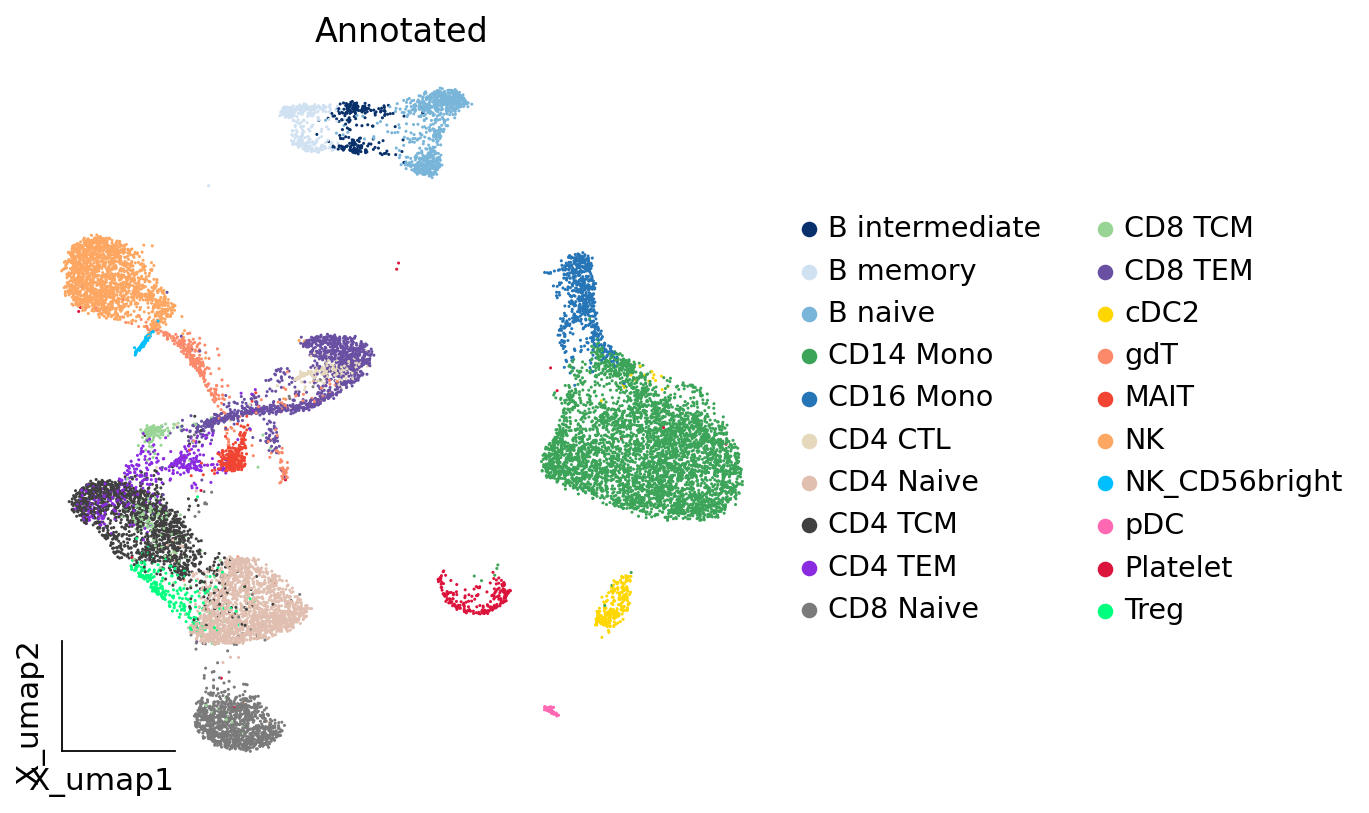

In [26]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize = (6,6))
ov.pl.embedding(adata,
                basis='X_umap',
               color='celltype.l2',
               frameon='small',
               show=False,
               palette=palette,
               ax=ax,)
plt.title('Annotated',fontsize=15)

In [34]:

celltype_id_labels = adata.obs["celltype.l2"].astype("category").cat.codes.values
celltypes = adata.obs["celltype.l2"].unique()
num_types = len(np.unique(celltype_id_labels))
id2type = dict(enumerate(adata.obs["celltype.l2"].astype("category").cat.categories))
adata.obs["celltype_id"] = celltype_id_labels
celltypes_labels = adata.obs["celltype_id"].tolist()  # make sure count from 0
celltypes_labels = np.array(celltypes_labels)

predictions=np.load("/home/jiboya/Captain/cell_type_anno/dataset1/8predictions.npy")




In [35]:
predictions.shape

(15892,)

In [36]:

# compute accuracy, precision, recall, f1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(celltypes_labels, predictions)
precision = precision_score(celltypes_labels, predictions, average="macro")
recall = recall_score(celltypes_labels, predictions, average="macro")
macro_f1 = f1_score(celltypes_labels, predictions, average="macro")

print(
    f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, "
    f"Macro F1: {macro_f1:.3f}"
)



Accuracy: 0.952, Precision: 0.930, Recall: 0.924, Macro F1: 0.927


In [37]:

mapped_celltypes = [id2type[pred_id] for pred_id in predictions.flatten()] 

In [38]:
adata.obs['celltype.pred']  = mapped_celltypes

Text(0.5, 1.0, 'Predicted')

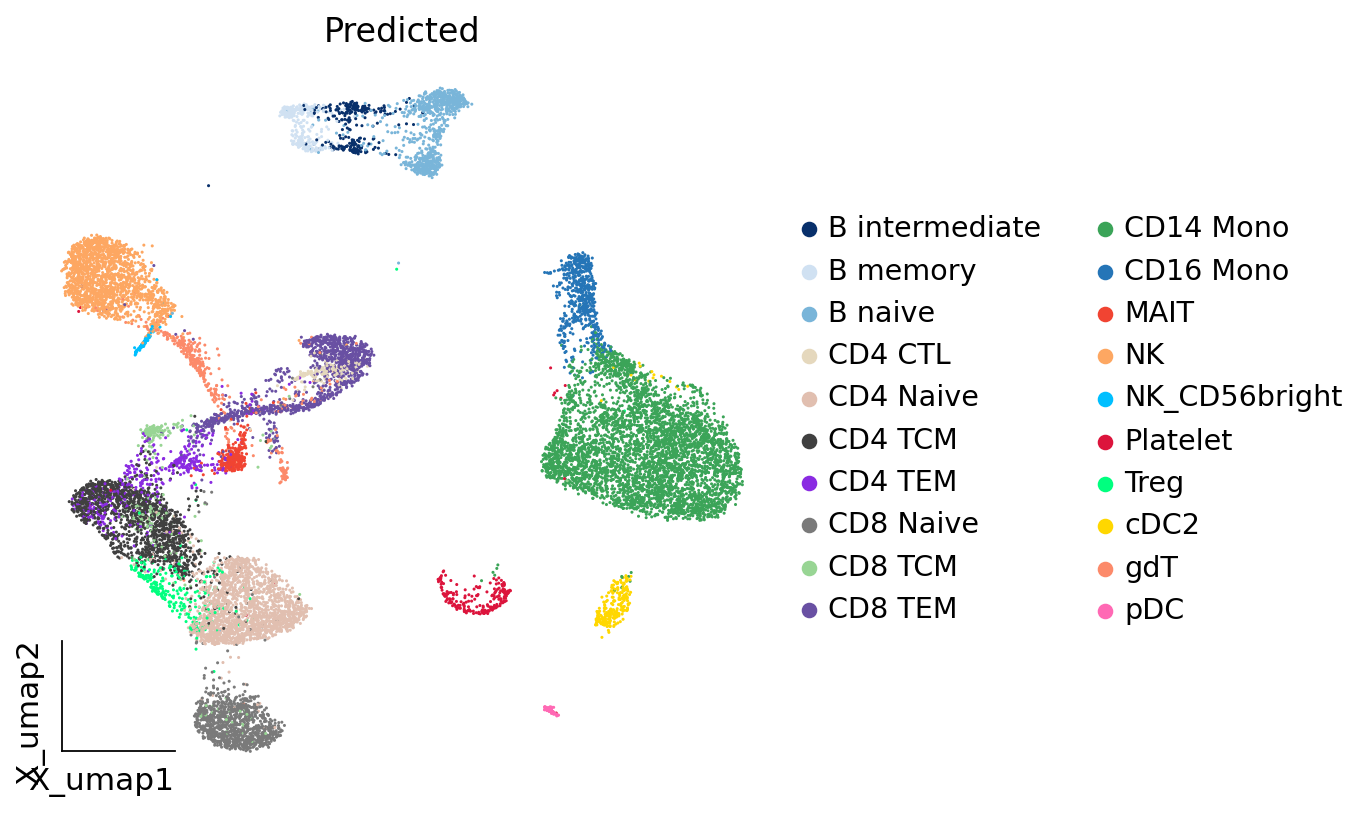

In [39]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize = (6,6))
ov.pl.embedding(adata,
                basis='X_umap',
               color='celltype.pred',
               frameon='small',
               show=False,
               palette=palette,
               ax=ax,)
plt.title('Predicted',fontsize=15)

<AxesSubplot: >

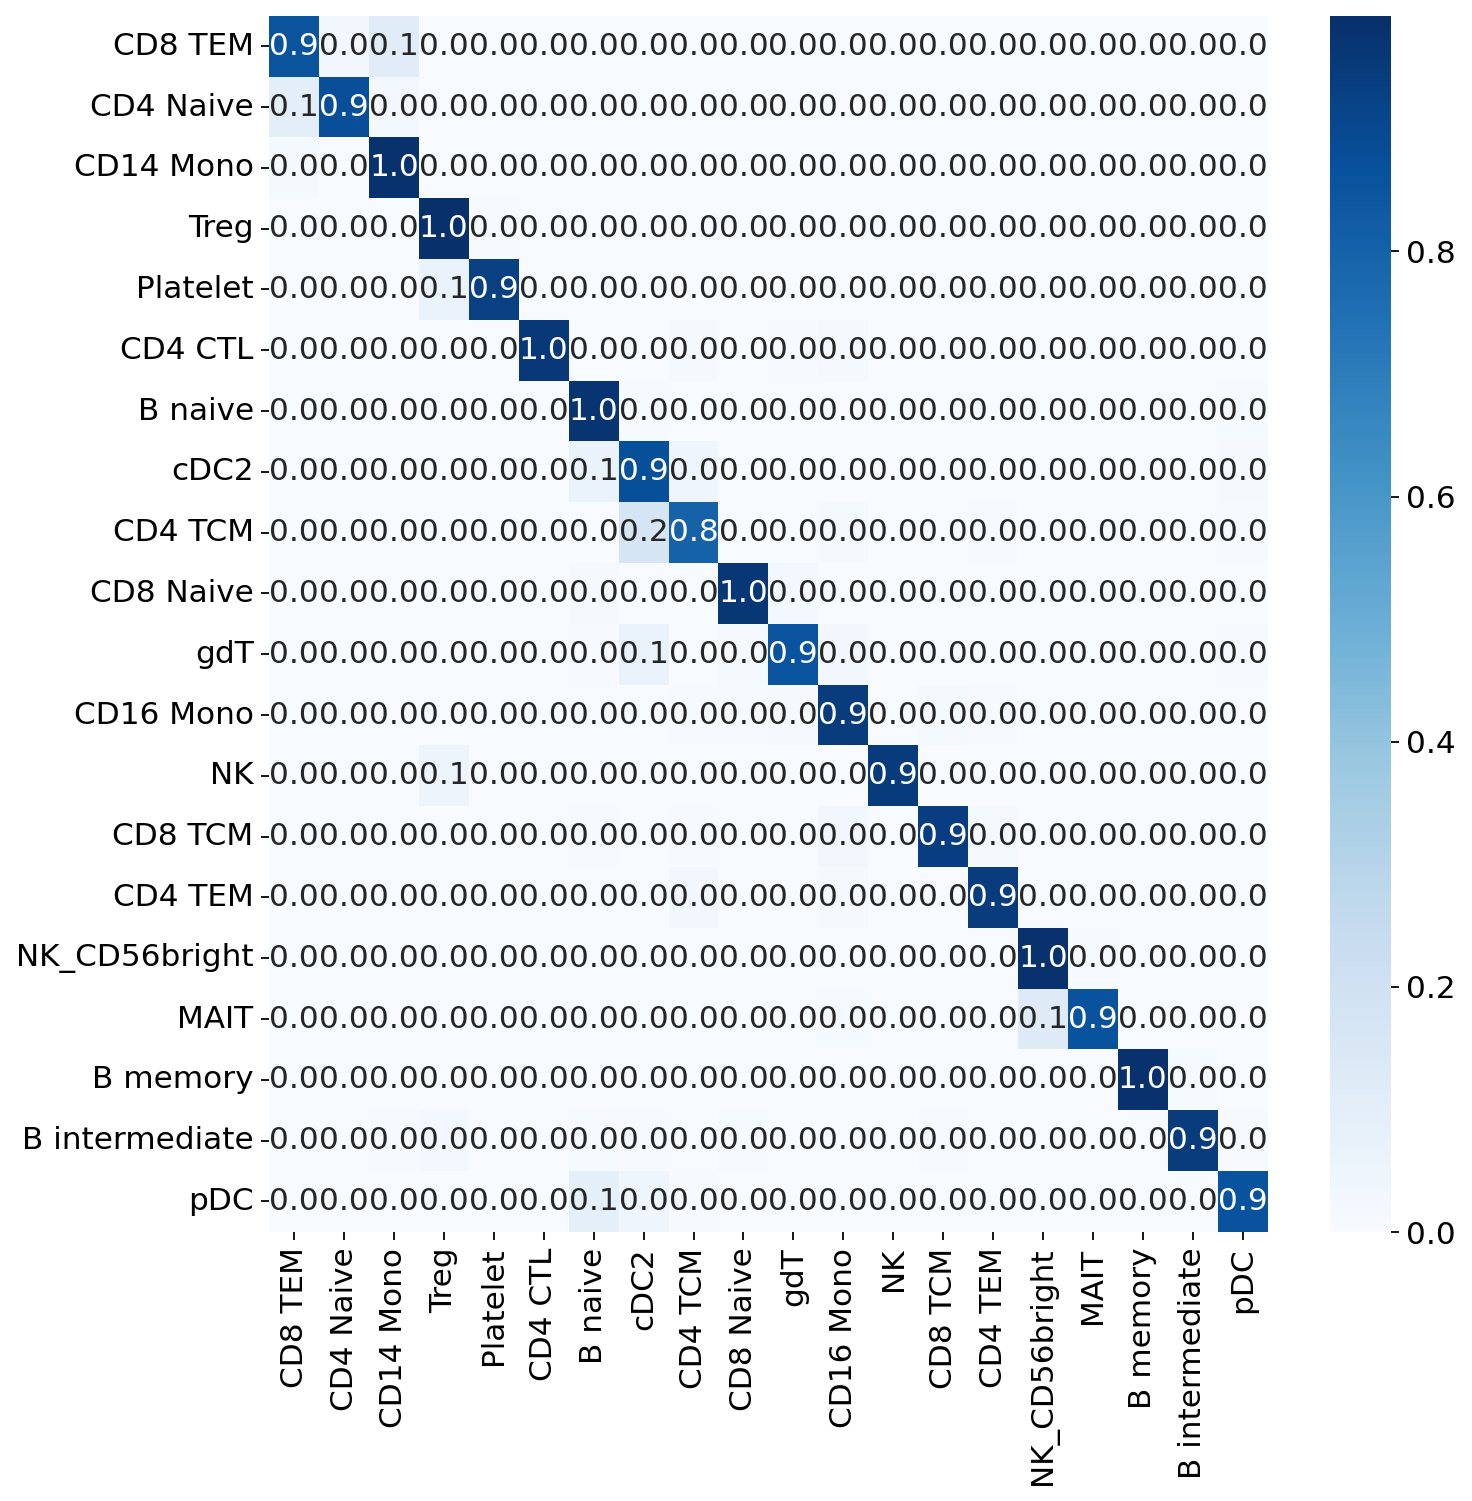

In [40]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
celltypes = list(adata.obs["celltype.l2"].unique())
for i in set([id2type[p] for p in predictions]):
    if i not in celltypes:
        celltypes.remove(i)
cm = confusion_matrix(celltypes_labels, predictions)
cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
cm = pd.DataFrame(cm, index=celltypes[:cm.shape[0]], columns=celltypes[:cm.shape[1]])
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".1f", cmap="Blues")
